## Analysis of spatial expression data

The gene expression matrices have already undergone preprocessing and normalisation.
Therefore, we do the following analysis steps:

- Dimensionality reduction, clustering and visualisation
- Identification of highly variable genes


Select dataset - can be one of `dataset_1`, `dataset_2`, `dataset_3`

In [67]:
dataset = 'dataset3'

Module imports

In [68]:
import scanpy as sc
import phenograph
import numpy as np
import pandas as pd

Data import

In [69]:
# Gene expression matrix
gex_res = pd.read_csv(f'../reproduce_data/{dataset}/gex_res.csv', index_col=0)
tensionmap_data = pd.read_csv(f'../reproduce_data/{dataset}/tensionmap_res.csv', index_col=0)

Dimensionality reduction and visualisation

In [70]:
# Convert data to AnnData format
adata = sc.AnnData(gex_res.T)
adata.obs['celltype'] = tensionmap_data['celltype'].values

/var/folders/tf/dxng8s6d0r71m3ynlsc4pw4r0000gn/T/ipykernel_83364/3132757547.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(gex_res.T)


In [71]:
# PCA and UMAP
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

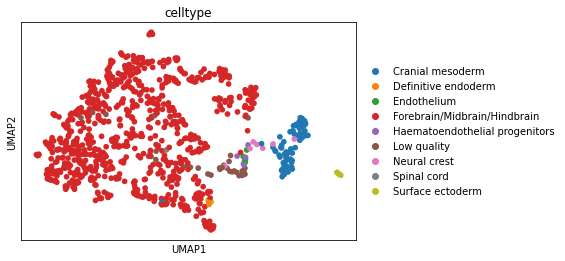

In [72]:
# Visualise UMAP coloured by celltype annotations from Lohoff et al., 2022

sc.pl.umap(adata, color='celltype')

Clustering with Phenograph

In [73]:
gex_labels,_,_ = phenograph.cluster(pd.DataFrame(adata.obsm['X_pca']))
adata.obs['phenograph_clusters'] = pd.Categorical(gex_labels)

Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 0.0403599739074707 seconds
Jaccard graph constructed in 4.644725799560547 seconds
Wrote graph to binary file in 0.014543771743774414 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.786908
After 2 runs, maximum modularity is Q = 0.790026
After 3 runs, maximum modularity is Q = 0.79152
After 10 runs, maximum modularity is Q = 0.794717
Louvain completed 30 runs in 1.026561975479126 seconds
Sorting communities by size, please wait ...
PhenoGraph completed in 7.889738082885742 seconds


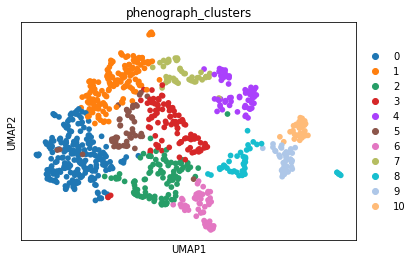

In [74]:
sc.pl.umap(adata, color='phenograph_clusters')

Select highly variable genes

In [75]:
sc.pp.filter_genes(adata, min_cells = (tensionmap_data.shape[0]/2))
sc.pp.highly_variable_genes(adata, inplace=True, n_top_genes=3000, flavor='seurat_v3')
var_genes = adata.var.loc[adata.var['highly_variable']].index.values

/Users/ruiyanghe/opt/anaconda3/envs/tensionmap-new/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:62: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  warnings.warn(


In [76]:
# Save list of highly variable genes - this will be required in later step

np.savetxt(f'./temp_data/highly_variable.txt', var_genes, fmt='%s')